$$
\newcommand{\Ex}{\mathbb{E}}
\newcommand{\Var}{\mathrm{Var}}
\newcommand{\Cov}{\mathrm{Cov}}
\newcommand{\SampleAvg}{\frac{1}{N({S})} \sum_{s \in {S}}}
\newcommand{\indic}{\mathbb{1}}
\newcommand{\avg}{\overline}
\newcommand{\est}{\hat}
\newcommand{\trueval}[1]{#1^{*}}
\newcommand{\Gam}[1]{\mathrm{Gamma}#1}
$$

$$
\renewcommand{\like}{\cal L}
\renewcommand{\loglike}{\ell}
\renewcommand{\err}{\cal E}
\renewcommand{\dat}{\cal D}
\renewcommand{\hyp}{\cal H}
\renewcommand{\Ex}[2]{E_{#1}[#2]}
\renewcommand{\x}{\mathbf x}
\renewcommand{\v}[1]{\mathbf #1}
$$

If we assume that data is generated by a distribution parameterized by a true parameter $\theta^*$. Our job is to infer this value from the provided data. 

This is the parametric way of doing data analysis.

The frequentist view is that $\theta^*$ is fixed and we approximate it as $\hat{\theta}$ using our limited sample.

A distribution is induced on this estimate by considering may samples that could have been drawn from the population. This distribution is called the **sampling distiribution of the parameter $\theta$.

How do we estimate $\hat{\theta}$? And how do we compute this sampling distribution so that we can have a notion of uncertainty of our estimation.

To estimate we use the Maximum Likelihood estimate.

To compute sampling distribution, we us bootstrap techniques.

We will learn about MLE in the context of the exponetial distribution.

# The idea behind the MLE

![mle](../gfx/gaussmle.png)


In the above figure, we have two distributions from the same family but with different parameters, $\theta = 1.8$ and $\theta = 5.8$. And suppose we have 3 data points, the red points.

MLE idea is given data, which ditribution is the data more likely to have come from?

If we assume the data points are i.i.d then the probability of data will be the product of the probabiliy of each data points. In the above picture, this data likelihood will be the product of three vertical length. Obviously the blue bars will have bigger product than that of the green ones.

So the question turns into how do we move around the distribution using $\theta$ so that this product is maximized.

We have the likelihood of data $$L(\lambda) = \prod_{i=1}^{n}p(x_i|\lambda)$$

Often it is easier and numerically more stable to maximise the log likelihood: $$l(\lambda) = \sum_{i=1}^{n}\ln(p(x_i|\lambda)$$

if we assume that the distribution is an exponential distribution $f(x,\lambda) = \lambda e^{-\lambda x}$. Then maximize the log likelihood will be achieved by setting $\frac{1}{\lambda} = \frac{1}{n}\sum_{i=1}^{n}x_i$

In the case of exponetial distribution, we were able to maximize the log likelihood analytically, i.e., having a formula. Normally we would have to use numerical optimization procedure such as gradient descent. 

A crucial property is that, for many commonly occurring situations, maximum likelihood parameter estimators have an approximate normal distribution when n is large.


# Inference
We can use bootstrap as a way to build sampling distribution of our estimation $\hat{\theta}$

![](../gfx/linregmle.png)

The fundamental assumption for the probabilistic analysis of linear regression is that each $y_i$ is gaussian distributed with mean  $\v{w}\cdot\v{x_i}$ (the y predicted by the regression line so to speak) and variance $\sigma^2$:

$$ y_i \sim N(\v{w}\cdot \v{x_i}, \sigma^2) .$$

We can then write the likelihood:

$$\cal{L} = p(\v{y} | \v{x}, \v{w}, \sigma) = \prod_i p(\v{y}_i | \v{x}_i, \v{w}, \sigma)$$

Given the canonical form of the gaussian:

$$N(\mu, \sigma^2) = \frac{1}{\sigma\sqrt{2\pi}} e^{-(y - \mu)^2 / 2\sigma^2},$$

we can show that:

$$\cal{L} =  (2\pi\sigma^2)^{(-n/2)} e^{\frac{-1}{2\sigma^2} \sum_i (y_i -  \v{w}\cdot\v{x}_i)^2} .$$

The log likelihood $\ell$ then is given by:

$$\ell = \frac{-n}{2} log(2\pi\sigma^2) - \frac{1}{2\sigma^2}  \sum_i (y_i -  \v{w}\cdot\v{x}_i)^2 .$$

If you differentiate this with respect to  $\v{w}$ and $\sigma$, you get the MLE values of the parameter estimates:

$$\v{w}_{MLE} = (\v{X}^T\v{X})^{-1} \v{X}^T\v{y}, $$

where $\v{X}$ is the design matrix created by stacking rows $\v{x}_i$, and

$$\sigma^2_{MLE} =  \frac{1}{n} \sum_i (y_i -  \v{w}\cdot\v{x}_i)^2  . $$

These are the standard results of linear regression.

## Logistic regression MLE

Logistic regression if one of the well known **supervized** learning algorithms used for classification.

The idea behind logistic regression is very simple. We want to draw a line in feature space that divides the '1' samples from the '0' samples, just like in the diagram above. In other words, we wish to find the "regression" line which divides the samples. Now, a line has the form $w_1 x_1 + w_2 x_2 + w_0 = 0$ in 2-dimensions. On one side of this line we have 

$$w_1 x_1 + w_2 x_2 + w_0 \ge 0,$$

and on the other side we have 

$$w_1 x_1 + w_2 x_2 + w_0 < 0.$$ 

Our classification rule then becomes:

$$
\begin{eqnarray}
y = 1 &if& \v{w}\cdot\v{x} \ge 0\\
y = 0 &if& \v{w}\cdot\v{x} < 0
\end{eqnarray}
$$

where $\v{x}$ is the vector $\{1,x_1, x_2,...,x_n\}$ where we have also generalized to more than 2 features.

What hypotheses $h$ can we use to achieve this? One way to do so is to use the **sigmoid** function:

$$h(z) = \frac{1}{1 + e^{-z}}.$$

Notice that at $z=0$ this function has the value 0.5. If $z > 0$, $h > 0.5$ and as $z \to \infty$, $h \to 1$. If $z < 0$, $h < 0.5$ and as $z \to -\infty$, $h \to 0$. As long as we identify any value of $y > 0.5$ as 1, and any $y < 0.5$ as 0, we can achieve what we wished above.

This function is plotted below:

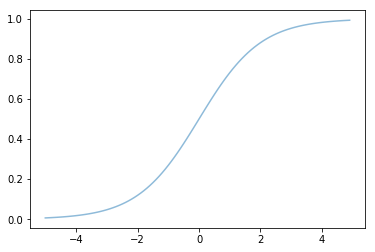

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
h = lambda z: 1./(1+np.exp(-z))
zs=np.arange(-5,5,0.1)
plt.plot(zs, h(zs), alpha=0.5);

We said above that if $h > 0.5$ we ought to identify the sample with $y=1$? One way of thinking about this is to identify $h(\v{w}\cdot\v{x})$ with the probability that the sample is a '1' ($y=1$). Then we have the intuitive notion that lets identify a sample as 1 if we find that the probabilty of being a '1' is $\ge 0.5$.

So suppose we say then that the probability of $y=1$ for a given $\v{x}$ is given by $h(\v{w}\cdot\v{x})$?

Then, the conditional probabilities of $y=1$ or $y=0$ given a particular sample's features $\v{x}$ are:

$$\begin{eqnarray}
P(y=1 | \v{x}) &=& h(\v{w}\cdot\v{x}) \\
P(y=0 | \v{x}) &=& 1 - h(\v{w}\cdot\v{x}).
\end{eqnarray}$$

These two can be written together as

$$P(y|\v{x}, \v{w}) = h(\v{w}\cdot\v{x})^y \left(1 - h(\v{w}\cdot\v{x}) \right)^{(1-y)} $$

Then multiplying over the samples we get the probability of the training $y$ given $\v{w}$ and the $\v{x}$:

$$P(y|\v{x},\v{w}) = P(\{y_i\} | \{\v{x}_i\}, \v{w}) = \prod_{y_i \in \cal{D}} P(y_i|\v{x_i}, \v{w}) = \prod_{y_i \in \cal{D}} h(\v{w}\cdot\v{x_i})^{y_i} \left(1 - h(\v{w}\cdot\v{x_i}) \right)^{(1-y_i)}$$

Why use probabilities? Earlier, we talked about how the regression function $f(x)$ never gives us the $y$ exactly, because of noise. This hold for classification too. Even with identical features, a different sample may be classified differently. 

We said that another way to think about a noisy $y$ is to imagine that our data $\dat$ was generated from  a joint probability distribution $P(x,y)$. Thus we need to model $y$ at a given $x$, written as $P(y \mid x)$, and since $P(x)$ is also a probability distribution, we have:

$$P(x,y) = P(y \mid x) P(x) ,$$

and can obtain our joint probability ($P(x, y))$.

Indeed its important to realize that a particular sample can be thought of as a draw from some "true" probability distribution. If for example the probability of classifying a sample point as a '0' was 0.1, and it turns out that the sample point was actually a '0', it does not mean that this model was necessarily wrong. After all, in roughly a 10th of the draws, this new sample would be classified as a '0'! But, of-course its more unlikely than its likely, and having good probabilities means that we'll be likely right most of the time, which is what we want to achieve in classification. 

Thus its desirable to have probabilistic, or at the very least, ranked models of classification where you can tell which sample is more likely to be classified as a '1'. 



Now if we maximize $$P(y \mid \v{x},\v{w})$$, we will maximize the chance that each point is classified correctly, which is what we want to do. This is a principled way of obtaining the highest probability classification. This **maximum likelihood** estimation maximises the **likelihood of the sample y**, 

$$\like = P(y \mid \v{x},\v{w}).$$ 


Again, we can equivalently maximize 

$$\loglike = log(P(y \mid \v{x},\v{w}))$$ 

since the natural logarithm $log$ is a monotonic function. This is known as maximizing the **log-likelihood**.


$$\loglike = log \like = log(P(y \mid \v{x},\v{w})).$$


Thus

$$\begin{eqnarray}
\loglike &=& log\left(\prod_{y_i \in \cal{D}} h(\v{w}\cdot\v{x_i})^{y_i} \left(1 - h(\v{w}\cdot\v{x_i}) \right)^{(1-y_i)}\right)\\
                  &=& \sum_{y_i \in \cal{D}} log\left(h(\v{w}\cdot\v{x_i})^{y_i} \left(1 - h(\v{w}\cdot\v{x_i}) \right)^{(1-y_i)}\right)\\                  
                  &=& \sum_{y_i \in \cal{D}} log\,h(\v{w}\cdot\v{x_i})^{y_i} + log\,\left(1 - h(\v{w}\cdot\v{x_i}) \right)^{(1-y_i)}\\
                  &=& \sum_{y_i \in \cal{D}} \left ( y_i log(h(\v{w}\cdot\v{x})) + ( 1 - y_i) log(1 - h(\v{w}\cdot\v{x})) \right )
\end{eqnarray}$$